In [164]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
%pylab inline


if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")

Populating the interactive namespace from numpy and matplotlib


Idea: Customer (24-hour pass) are less likely than Subscriber (Annual Member) to choose biking for commuting

Null Hypothesis: The proportion of Subscriber biking on weekends is the same or higher than the proportion of Customer biking on weekends

Alternative Hypothesis: The proportion of Subscriber biking on weekends is less than the proportion of Customer biking on weekends

# _$H_0$_ : $\frac{C_{\mathrm{weekend}}}{C_{\mathrm{total}}} - \frac{S_{\mathrm{weekend}}}{S_{\mathrm{total}}} <= 0 $
 
# _$H_1$_ : $\frac{c_{\mathrm{weekend}}}{C_{\mathrm{total}}} - \frac{S_{\mathrm{weekend}}}{S_{\mathrm{total}}} > 0$

I will use a significance level  α=0.05α=0.05 
which means I want the probability of getting a result at least as significant as mine to be less then 5%

In [165]:
#I directly used this code from the example python notebook

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")
    else:
        print ("file in place, you can continue")

In [166]:
#initiate the first data frame 
datestring = '201601'
getCitiBikeCSV(datestring)
df_1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

file in place, you can continue


In [167]:
#initiate the second data frame 
datestring = '201602'
getCitiBikeCSV(datestring)
df_2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

file in place, you can continue


In [168]:
#combine these two data frames
frames = [df_1, df_2]
df = pd.concat(frames,ignore_index=True)

In [169]:
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1
5,332,1/1/2016 00:01:19,1/1/2016 00:06:51,3104,Kent Ave & N 7 St,40.720577,-73.961502,389,Broadway & Berry St,40.710446,-73.965251,15788,Subscriber,1984.0,1
6,2321,1/1/2016 00:01:27,1/1/2016 00:40:08,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3164,Columbus Ave & W 72 St,40.777057,-73.978985,24183,Subscriber,1963.0,1
7,694,1/1/2016 00:02:18,1/1/2016 00:13:53,268,Howard St & Centre St,40.719105,-73.999733,497,E 17 St & Broadway,40.737050,-73.990093,15747,Subscriber,1996.0,1
8,1376,1/1/2016 00:03:12,1/1/2016 00:26:09,527,E 33 St & 2 Ave,40.744023,-73.976056,259,South St & Whitehall St,40.701221,-74.012342,23933,Subscriber,1963.0,1
9,615,1/1/2016 00:03:43,1/1/2016 00:13:59,432,E 7 St & Avenue A,40.726218,-73.983799,311,Norfolk St & Broome St,40.717227,-73.988021,23993,Subscriber,1971.0,1


In [170]:
df.tail(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1070342,104,2/29/2016 23:57:47,2/29/2016 23:59:31,453,W 22 St & 8 Ave,40.744751,-73.999154,116,W 17 St & 8 Ave,40.741776,-74.001497,22681,Subscriber,1992.0,1
1070343,940,2/29/2016 23:57:50,3/1/2016 00:13:30,237,E 11 St & 2 Ave,40.730473,-73.986724,471,Grand St & Havemeyer St,40.712868,-73.956981,17656,Subscriber,1990.0,1
1070344,757,2/29/2016 23:57:58,3/1/2016 00:10:35,459,W 20 St & 11 Ave,40.746745,-74.007756,358,Christopher St & Greenwich St,40.732916,-74.007114,24279,Subscriber,1944.0,1
1070345,1002,2/29/2016 23:58:34,3/1/2016 00:15:17,251,Mott St & Prince St,40.723180,-73.994800,174,E 25 St & 1 Ave,40.738177,-73.977387,22298,Subscriber,1977.0,1
1070346,1136,2/29/2016 23:58:54,3/1/2016 00:17:50,532,S 5 Pl & S 4 St,40.710451,-73.960876,3108,Nassau Ave & Russell St,40.725570,-73.944340,16595,Customer,NaN,0
1070347,1013,2/29/2016 23:59:13,3/1/2016 00:16:07,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3150,E 85 St & York Ave,40.775369,-73.948034,17765,Subscriber,1962.0,1
1070348,1382,2/29/2016 23:59:18,3/1/2016 00:22:20,335,Washington Pl & Broadway,40.729039,-73.994046,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,23465,Subscriber,1976.0,1
1070349,524,2/29/2016 23:59:20,3/1/2016 00:08:04,447,8 Ave & W 52 St,40.763707,-73.985162,514,12 Ave & W 40 St,40.760875,-74.002777,24126,Subscriber,1973.0,2
1070350,1120,2/29/2016 23:59:28,3/1/2016 00:18:08,305,E 58 St & 3 Ave,40.760958,-73.967245,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,20535,Subscriber,1966.0,1
1070351,301,2/29/2016 23:59:55,3/1/2016 00:04:56,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,3106,Driggs Ave & N Henry St,40.723250,-73.943080,15356,Subscriber,1984.0,1


In [171]:
#create a new "date" column; use the format function to increase efficiency
df['date'] = pd.to_datetime(df['starttime'],format="%m/%d/%Y %H:%M:%S")

In [172]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [173]:
#drop unnecessary columns
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1,inplace=True)

In [174]:
df.head()

,usertype,date
0,Subscriber,2016-01-01 00:00:41
1,Subscriber,2016-01-01 00:00:45
2,Subscriber,2016-01-01 00:00:48
3,Subscriber,2016-01-01 00:01:06
4,Subscriber,2016-01-01 00:01:12


In [175]:
df['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

Text(0,0.5,'Number of Ride')

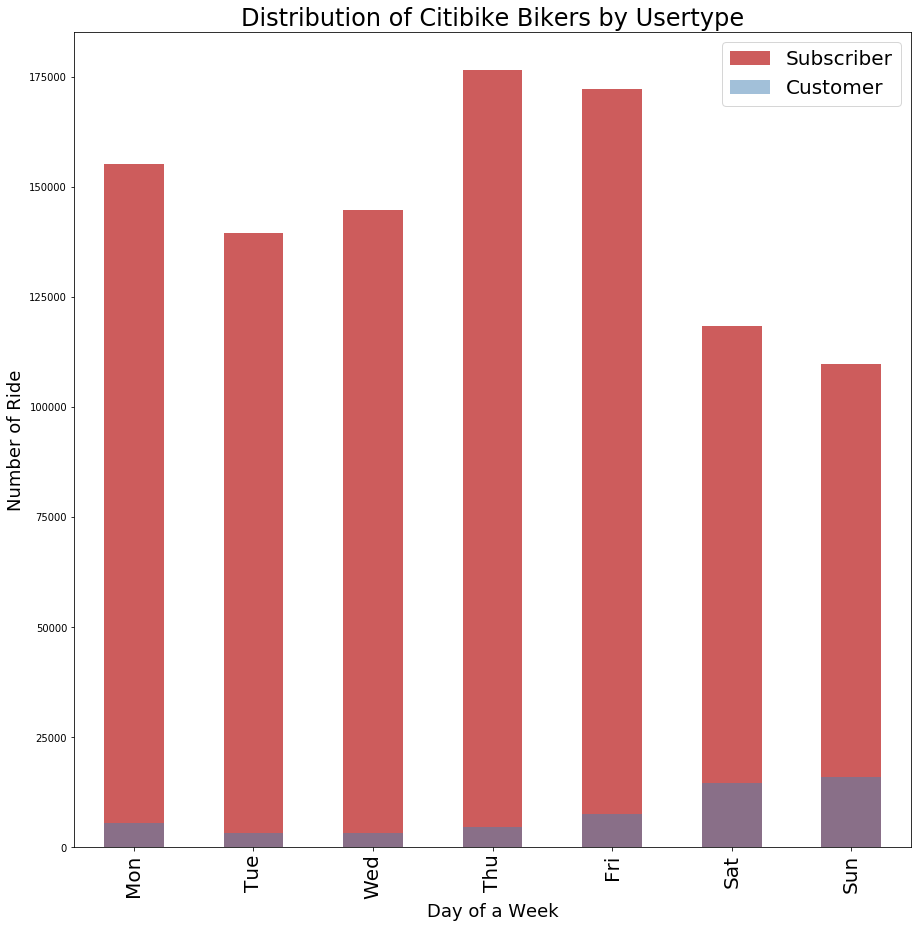

In [176]:
fig = pl.figure(figsize(15,15))


((df['date'][df['usertype'] == "Subscriber"].groupby([df['date'].dt.weekday]).count()) / 1).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Subscriber')

ax = ((df['date'][df['usertype'] == "Customer"].groupby([df['date'].dt.weekday]).count()) / 1).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Customer')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend(['Subscriber','Customer'],fontsize=20)
pl.title('Distribution of Citibike Bikers by Usertype', fontsize = 24)
pl.xlabel('Day of a Week',fontsize = 18)
pl.ylabel('Number of Ride',fontsize = 18)

Figure 1a: Distribution of Citibike bikers by Usertype,"Subscriber" and "Customer", from January 2016 to February 2016, absolute counts. Shown number of "subscriber" bikers decreases on weekends, but number of "customer" bikers increases on weekends.

Text(0,0.5,'Number of Ride')

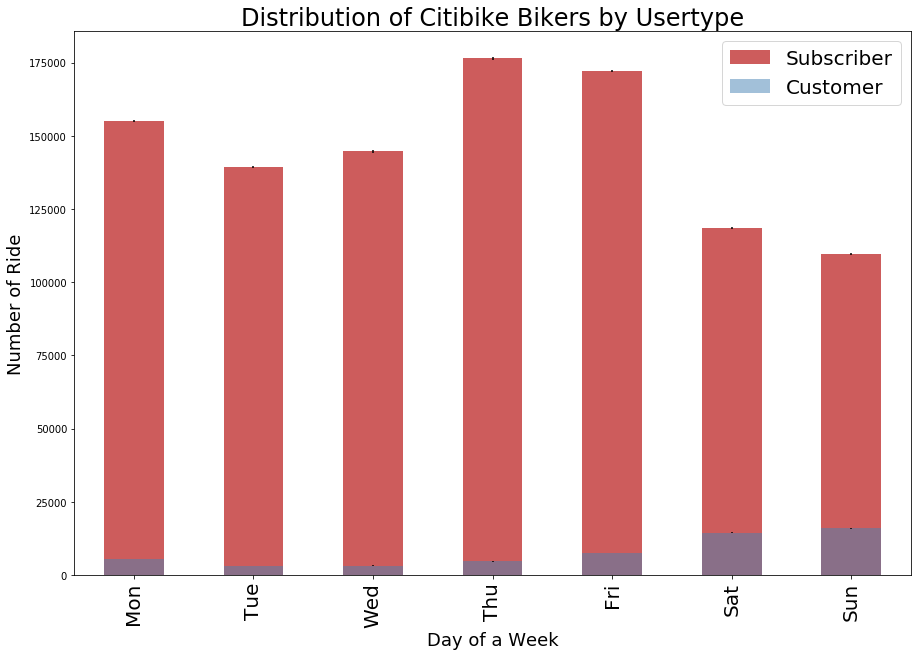

In [177]:
fig=pl.figure(figsize(15,10))

norm_s = 1
counts_s = df.date[df.usertype == 'Subscriber'].groupby([df.date.dt.weekday]).count()
error_s = np.sqrt(counts_s)
ax=((counts_s) / norm_s).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_s) / norm_s, (error_s) / norm_s)], label='Subscriber')


counts_c = df.date[df.usertype == 'Customer'].groupby([df.date.dt.weekday]).count()
norm_c = 1
error_c=np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", alpha=0.5, yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           color='SteelBlue', label='Customer')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['Subscriber','Customer'],fontsize=20)
pl.title('Distribution of Citibike Bikers by Usertype', fontsize = 24)
pl.xlabel('Day of a Week',fontsize = 18)
pl.ylabel('Number of Ride',fontsize = 18)

Figure 1b: Distribution of Citibike bikers by Usertype, "Subscriber" and "Customer", from January 2016 to February 2016, with statistical errors.

Text(0,0.5,'Fraction of rides')

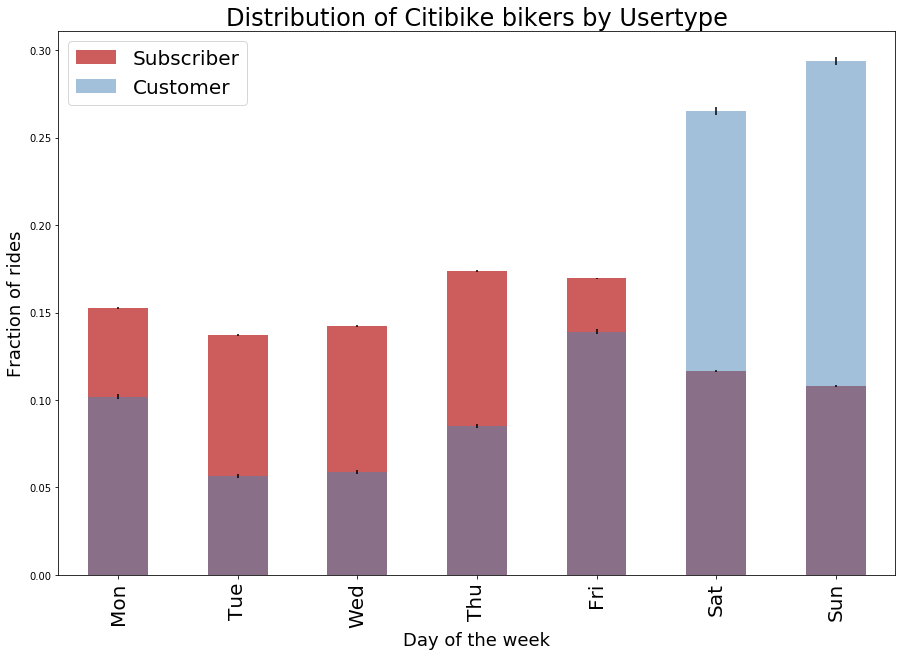

In [178]:
fig = pl.figure(figsize(15,10))

norm_s = counts_s.sum()
error_s = np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           label='Subscriber')

norm_c = counts_c.sum()
ax = ((counts_c) / norm_c).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                                color='SteelBlue', label='Customer')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)


pl.legend(['Subscriber','Customer'],fontsize=20)
pl.title('Distribution of Citibike bikers by Usertype', fontsize = 24)
pl.xlabel("Day of the week",fontsize = 18)
pl.ylabel('Fraction of rides',fontsize = 18)


Figure 2: Distribution of Citibike bikers by Usertype, "Subscriber" and "Customer", from January 2016 to February 2016, normalized. Shown the changes of number of "Customer" rider and "Subscriber" rider form weekday to weekends. 